In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
!pip install livelossplot

In [3]:
from livelossplot import PlotLossesKeras

## Streak case

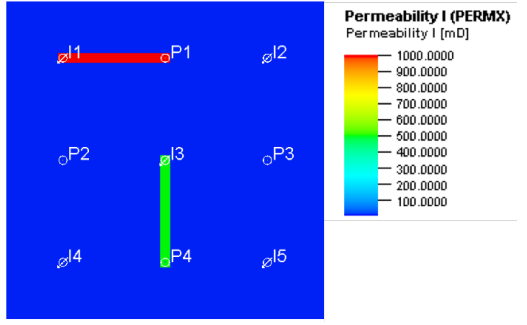

In [4]:
prod_streak = pd.read_excel('./Streak/Production_streak.xlsx')
inj_streak = pd.read_excel('./Streak/Injection_streak.xlsx')

In [5]:
inj_streak

,Date,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [6]:
prod_streak

,Date,P1,P2,P3,P4
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823
...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443


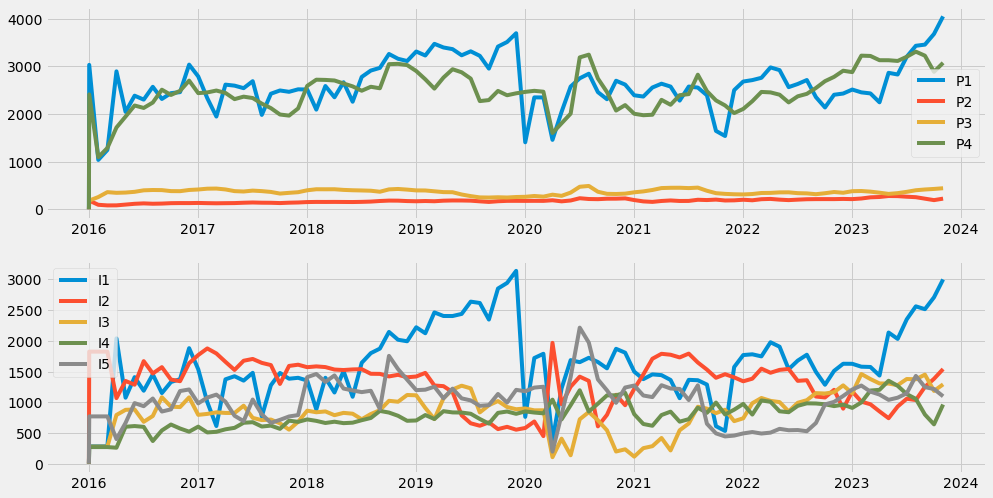

In [7]:
#plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(prod_streak.Date,prod_streak.P1, label='P1')
ax[0].plot(prod_streak.Date,prod_streak.P2, label='P2')
ax[0].plot(prod_streak.Date,prod_streak.P3, label='P3')
ax[0].plot(prod_streak.Date,prod_streak.P4, label='P4')
ax[0].legend()


ax[1].plot(inj_streak.Date,inj_streak.I1, label='I1')
ax[1].plot(inj_streak.Date,inj_streak.I2, label='I2')
ax[1].plot(inj_streak.Date,inj_streak.I3, label='I3')
ax[1].plot(inj_streak.Date,inj_streak.I4, label='I4')
ax[1].plot(inj_streak.Date,inj_streak.I5, label='I5')
ax[1].legend()

In [8]:
# train test split
try:
    
    inj_streak = inj_streak.drop(columns=['Date'])
except KeyError:
    inj_nonstreak
    
    
streak = pd.concat([prod_streak,inj_streak],axis=1)
streak

,Date,P1,P2,P3,P4,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [9]:
# train size = 60%

#streak_val = streak.drop(columns=['Time days'])
train_stop = 60
train, test = streak.iloc[:train_stop,5:].values,streak.iloc[train_stop:,5:].values
streak_p1_train, streak_p1_test = streak.iloc[:train_stop,1].values,streak.iloc[train_stop:,1].values
streak_p2_train, streak_p2_test = streak.iloc[:train_stop,2].values,streak.iloc[train_stop:,2].values
streak_p3_train, streak_p3_test = streak.iloc[:train_stop,3].values,streak.iloc[train_stop:,3].values
streak_p4_train, streak_p4_test = streak.iloc[:train_stop,4].values,streak.iloc[train_stop:,4].values

In [10]:
def scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data,sc

def production_preprocessing(data,train_stop,number_of_p_well = 1):
    train, test = data.iloc[:train_stop,5:].values,data.iloc[train_stop:,5:].values
    p_train,p_test = data.iloc[:train_stop,number_of_p_well].values,data.iloc[train_stop:,number_of_p_well].values
    
    x_train,y_train =np.column_stack((train,p_train)),p_train
    x_test,y_test =np.column_stack((test,p_test)),p_test
    
    x_train_scaled,x_train_sc = scaling(x_train)
    x_test_scaled,x_test_sc = scaling(x_test)
    y_test_scaled,y_test_sc = scaling(y_test.reshape(-1,1))
    y_train_scaled,y_train_sc = scaling(y_train.reshape(-1,1))
    
    
    x_train_scaled,y_train_scaled = x_train_scaled.reshape((60,1,6)), y_train_scaled.reshape(60,1,1)
    x_test_scaled,y_test_scaled = x_test_scaled.reshape((36,1,6)), y_test_scaled.reshape(36,1)
    return x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

# Non streak case

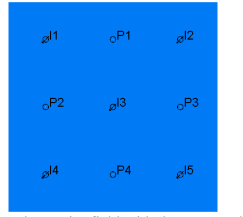

In [11]:
prod_nonstreak = pd.read_excel('./Non_Streak/Production_nonstreak.xlsx')
inj_nonstreak = pd.read_excel('./Non_Streak/Injection_nonstreak.xlsx')

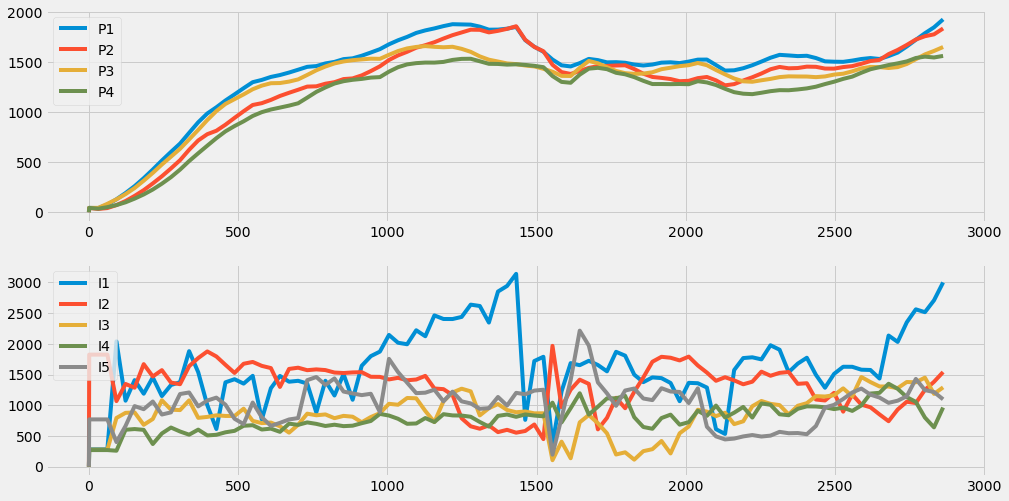

In [12]:
fig,ax = plt.subplots(2,1, figsize=(15,8))
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P1, label='P1')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P2, label='P2')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P3, label='P3')
ax[0].plot(prod_nonstreak['Time [days]'],prod_nonstreak.P4, label='P4')
ax[0].legend()

ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I1, label='I1')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I2, label='I2')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I3, label='I3')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I4, label='I4')
ax[1].plot(inj_nonstreak['Time [days]'],inj_nonstreak.I5, label='I5')
ax[1].legend()

In [13]:
# train test split
try:
    
    inj_nonstreak = inj_nonstreak.drop(columns=['Time [days]'])
except KeyError:
    inj_nonstreak
    
    
non_streak = pd.concat([prod_nonstreak,inj_nonstreak],axis=1)
non_streak

,Time [days],P1,P2,P3,P4,I1,I2,I3,I4,I5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,42.794113,42.794086,42.794121,42.794094,284.662415,1824.588013,278.588287,270.050903,769.642883
2,31.430000,41.098396,32.640354,43.460705,34.996902,284.674286,1824.665039,278.600098,270.062286,769.675415
3,61.867500,74.807091,41.005371,83.802605,50.165264,284.674286,1824.665039,278.600098,270.062286,769.675415
4,92.305000,129.125595,71.362114,128.713333,70.953720,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2740.367432,1658.946777,1674.509155,1483.775879,1509.722290,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2770.805420,1726.047363,1728.648315,1531.512329,1543.862793,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2801.242432,1791.977295,1761.811523,1579.751099,1557.398682,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2831.679443,1850.891846,1780.687378,1614.357544,1549.049438,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [14]:
# train size = 60%

#non_streak_val = non_streak.drop(columns=['Time days'])
train_stop = 60
train, test = non_streak.iloc[:train_stop,5:].values,non_streak.iloc[train_stop:,5:].values
non_streak_p1_train, non_streak_p1_test = non_streak.iloc[:train_stop,1].values,non_streak.iloc[train_stop:,1].values
non_streak_p2_train, non_streak_p2_test = non_streak.iloc[:train_stop,2].values,non_streak.iloc[train_stop:,2].values
non_streak_p3_train, non_streak_p3_test = non_streak.iloc[:train_stop,3].values,non_streak.iloc[train_stop:,3].values
non_streak_p4_train, non_streak_p4_test = non_streak.iloc[:train_stop,4].values,non_streak.iloc[train_stop:,4].values

In [15]:
x_train_p1,y_train_p1 =np.column_stack((train,non_streak_p1_train)),non_streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,non_streak_p2_train)),non_streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,non_streak_p3_train)),non_streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,non_streak_p4_train)),non_streak_p4_train


x_test_p1,y_test_p1 =np.column_stack((test,non_streak_p1_test)),non_streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,non_streak_p2_test)),non_streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,non_streak_p3_test)),non_streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,non_streak_p4_test)),non_streak_p4_test

In [16]:
p1 = production_preprocessing(non_streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(non_streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(non_streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(non_streak,train_stop,number_of_p_well = 4) 

# Reccurent neural network

# LSTM neural network

In [17]:
params = {
    "loss": "mean_squared_error",
    "optimizer": "adam",
    "dropout": 0.4,
    "lstm_units": 90,
    "epochs": 200,
    "batch_size": 6,
    "es_patience" : 10
}


def get_model(params, input_shape):
    model = Sequential()
    model.add(LSTM(128,return_sequences=True, input_shape=(input_shape, 6)))
    model.add(Dropout(params['dropout']))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(params['dropout']))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dropout(params['dropout']))
    model.add(LSTM(128,return_sequences=True))
    model.add(Dense(1))
    
    
    model.compile(loss=params["loss"],
              optimizer=params["optimizer"],
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
    
    

    return model

In [18]:
model1 = get_model(params=params, input_shape=p1[0].shape[1])
model2 = get_model(params=params, input_shape=p1[0].shape[1])
model3 = get_model(params=params, input_shape=p1[0].shape[1])
model4 = get_model(params=params, input_shape=p1[0].shape[1])

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            69120     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 128)            1

In [20]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', 
patience=params["es_patience"])

# Prediction for non streak case

In [21]:
# x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

history1 = model1.fit(p1[0],p1[1], validation_data=(p1[2], p1[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) #[PlotLossesKeras



history2 = model2.fit(p2[0],p2[1], validation_data=(p2[2], p2[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 



history3 = model3.fit(p3[0],p3[1], validation_data=(p3[2], p3[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 


history4 = model4.fit(p4[0],p4[1], validation_data=(p4[2], p4[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 

Epoch 1/200
10/10 [==============================] - 9s 231ms/step - loss: 1.0022 - root_mean_squared_error: 1.0011 - mean_absolute_error: 0.8129 - val_loss: 0.9941 - val_root_mean_squared_error: 0.9970 - val_mean_absolute_error: 0.6617
Epoch 2/200
10/10 [==============================] - 0s 36ms/step - loss: 0.9766 - root_mean_squared_error: 0.9883 - mean_absolute_error: 0.8048 - val_loss: 0.9617 - val_root_mean_squared_error: 0.9807 - val_mean_absolute_error: 0.6529
Epoch 3/200
10/10 [==============================] - 0s 31ms/step - loss: 0.8632 - root_mean_squared_error: 0.9291 - mean_absolute_error: 0.7586 - val_loss: 0.8247 - val_root_mean_squared_error: 0.9081 - val_mean_absolute_error: 0.6048
Epoch 4/200
10/10 [==============================] - 0s 36ms/step - loss: 0.5596 - root_mean_squared_error: 0.7480 - mean_absolute_error: 0.5957 - val_loss: 0.5297 - val_root_mean_squared_error: 0.7278 - val_mean_absolute_error: 0.4660
Epoch 5/200
10/10 [==============================] - 0s

Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 0.8353 - root_mean_squared_error: 0.9139 - mean_absolute_error: 0.7638 - val_loss: 0.7293 - val_root_mean_squared_error: 0.8540 - val_mean_absolute_error: 0.6105
Epoch 4/200
10/10 [==============================] - 0s 12ms/step - loss: 0.5041 - root_mean_squared_error: 0.7100 - mean_absolute_error: 0.5899 - val_loss: 0.2779 - val_root_mean_squared_error: 0.5272 - val_mean_absolute_error: 0.3555
Epoch 5/200
10/10 [==============================] - 0s 11ms/step - loss: 0.2096 - root_mean_squared_error: 0.4578 - mean_absolute_error: 0.3610 - val_loss: 0.2777 - val_root_mean_squared_error: 0.5270 - val_mean_absolute_error: 0.4395
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.1523 - root_mean_squared_error: 0.3903 - mean_absolute_error: 0.3097 - val_loss: 0.2138 - val_root_mean_squared_error: 0.4624 - val_mean_absolute_error: 0.3396
Epoch 7/200
10/10 [==============================] - 0s 

Epoch 38/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - mean_absolute_error: 0.0993 - val_loss: 0.0787 - val_root_mean_squared_error: 0.2806 - val_mean_absolute_error: 0.1929
Epoch 39/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - mean_absolute_error: 0.0875 - val_loss: 0.0876 - val_root_mean_squared_error: 0.2959 - val_mean_absolute_error: 0.1799
Epoch 1/200
10/10 [==============================] - 8s 206ms/step - loss: 0.9986 - root_mean_squared_error: 0.9993 - mean_absolute_error: 0.8151 - val_loss: 0.9930 - val_root_mean_squared_error: 0.9965 - val_mean_absolute_error: 0.7847
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.9794 - root_mean_squared_error: 0.9896 - mean_absolute_error: 0.8073 - val_loss: 0.9577 - val_root_mean_squared_error: 0.9786 - val_mean_absolute_error: 0.7696
Epoch 3/200
10/10 [==============================] - 

Epoch 34/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - mean_absolute_error: 0.1061 - val_loss: 0.0823 - val_root_mean_squared_error: 0.2870 - val_mean_absolute_error: 0.1445
Epoch 35/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0173 - root_mean_squared_error: 0.1316 - mean_absolute_error: 0.1064 - val_loss: 0.0837 - val_root_mean_squared_error: 0.2894 - val_mean_absolute_error: 0.1529
Epoch 36/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - mean_absolute_error: 0.0910 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2877 - val_mean_absolute_error: 0.1626
Epoch 37/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0250 - root_mean_squared_error: 0.1581 - mean_absolute_error: 0.1270 - val_loss: 0.0848 - val_root_mean_squared_error: 0.2913 - val_mean_absolute_error: 0.1582
Epoch 38/200
10/10 [==============================] 

Epoch 26/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0171 - root_mean_squared_error: 0.1307 - mean_absolute_error: 0.0983 - val_loss: 0.0533 - val_root_mean_squared_error: 0.2309 - val_mean_absolute_error: 0.1711
Epoch 27/200
10/10 [==============================] - 0s 14ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - mean_absolute_error: 0.1044 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345 - val_mean_absolute_error: 0.1686
Epoch 28/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0259 - root_mean_squared_error: 0.1611 - mean_absolute_error: 0.1246 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2695 - val_mean_absolute_error: 0.1777
Epoch 29/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0193 - root_mean_squared_error: 0.1389 - mean_absolute_error: 0.0870 - val_loss: 0.0596 - val_root_mean_squared_error: 0.2441 - val_mean_absolute_error: 0.1659
Epoch 30/200
10/10 [==============================] 

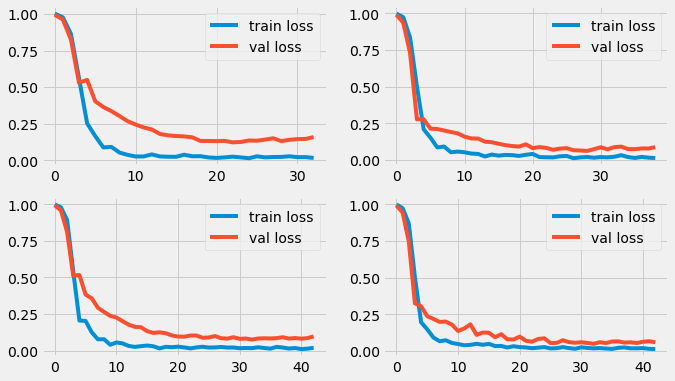

In [22]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(history1.history['loss'],label = 'train loss')
#plt.plot(history.history['mean_absolute_error']) val_loss
ax[0,0].plot(history1.history['val_loss'],label='val loss')
ax[0,0].legend()


ax[0,1].plot(history2.history['loss'],label = 'train loss')
ax[0,1].plot(history2.history['val_loss'],label='val loss')
ax[0,1].legend()

ax[1,0].plot(history3.history['loss'],label = 'train loss')
ax[1,0].plot(history3.history['val_loss'],label='val loss')
ax[1,0].legend()

ax[1,1].plot(history4.history['loss'],label = 'train loss')
ax[1,1].plot(history4.history['val_loss'],label='val loss')
ax[1,1].legend()

In [23]:
pred = model1.predict(p1[2])
pred_inv1 = p1[4].inverse_transform(pred.reshape(-1,1))

pred = model2.predict(p2[2])
pred_inv2 = p2[4].inverse_transform(pred.reshape(-1,1))

pred = model3.predict(p3[2])
pred_inv3 = p3[4].inverse_transform(pred.reshape(-1,1))

pred = model4.predict(p4[2])
pred_inv4 = p4[4].inverse_transform(pred.reshape(-1,1))

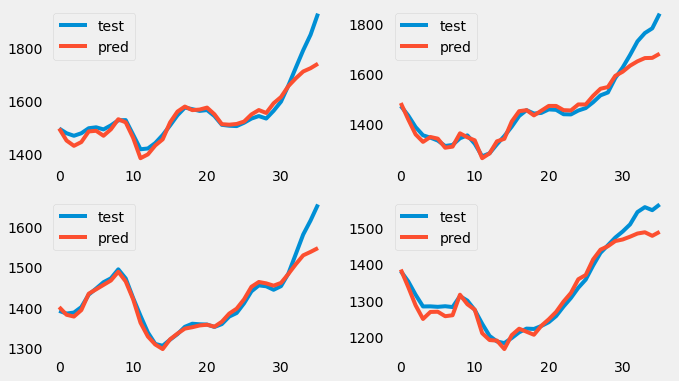

In [24]:
#y_test_p1 = sc_p1_y_test.inverse_transform(y_test_p1 .reshape(-1,1))

fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(y_test_p1,label='test')
ax[0,0].plot(pred_inv1,label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(y_test_p2,label='test')
ax[0,1].plot(pred_inv2,label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(y_test_p3,label='test')
ax[1,0].plot(pred_inv3,label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(y_test_p4,label='test')
ax[1,1].plot(pred_inv4,label='pred')
ax[1,1].grid()
ax[1,1].legend()

In [25]:
def rmse(test,pred):
    rmse = np.sqrt(((test-pred)**2/len(test)).sum())
    return rmse

rmse_common = (rmse(y_test_p1,pred_inv1) + rmse(y_test_p2,pred_inv2)+rmse(y_test_p3,pred_inv3) + rmse(y_test_p4,pred_inv4))/4
print(rmse_common)
r2_score_com = (r2_score(y_test_p1,pred_inv1)+r2_score(y_test_p2,pred_inv2) + r2_score(y_test_p3,pred_inv3) + r2_score(y_test_p4,pred_inv4))/4
print(r2_score_com)

879.7113264506443
0.8996259232239293


In [26]:
rmse_common = (mean_squared_error(y_test_p1,pred_inv1) + mean_squared_error(y_test_p2,pred_inv2)+mean_squared_error(y_test_p3,pred_inv3) + mean_squared_error(y_test_p4,pred_inv4))/4
print(rmse_common)

1289.228316848514


# Prediction for streak case

In [27]:
p1 = production_preprocessing(streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(streak,train_stop,number_of_p_well = 4) 


x_train_p1,y_train_p1 =np.column_stack((train,streak_p1_train)),streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,streak_p2_train)),streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,streak_p3_train)),streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,streak_p4_train)),streak_p4_train


x_test_p1,y_test_p1 =np.column_stack((test,streak_p1_test)),streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,streak_p2_test)),streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,streak_p3_test)),streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,streak_p4_test)),streak_p4_test

In [28]:
model1 = get_model(params=params, input_shape=p1[0].shape[1])
model2 = get_model(params=params, input_shape=p1[0].shape[1])
model3 = get_model(params=params, input_shape=p1[0].shape[1])
model4 = get_model(params=params, input_shape=p1[0].shape[1])

In [29]:
# x_train_scaled,y_train_scaled, x_test_scaled,y_test_scaled, y_test_sc

history1 = model1.fit(p1[0],p1[1], validation_data=(p1[2], p1[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) #[PlotLossesKeras



history2 = model2.fit(p2[0],p2[1], validation_data=(p2[2], p2[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 



history3 = model3.fit(p3[0],p3[1], validation_data=(p3[2], p3[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 


history4 = model4.fit(p4[0],p4[1], validation_data=(p4[2], p4[3]),epochs=params["epochs"], batch_size=params["batch_size"], verbose=1, callbacks=[ es_callback] ) 

Epoch 1/200
10/10 [==============================] - 8s 207ms/step - loss: 0.9997 - root_mean_squared_error: 0.9998 - mean_absolute_error: 0.7165 - val_loss: 0.9931 - val_root_mean_squared_error: 0.9966 - val_mean_absolute_error: 0.6895
Epoch 2/200
10/10 [==============================] - 0s 11ms/step - loss: 0.9843 - root_mean_squared_error: 0.9921 - mean_absolute_error: 0.7104 - val_loss: 0.9666 - val_root_mean_squared_error: 0.9832 - val_mean_absolute_error: 0.6782
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.9327 - root_mean_squared_error: 0.9657 - mean_absolute_error: 0.6914 - val_loss: 0.8548 - val_root_mean_squared_error: 0.9246 - val_mean_absolute_error: 0.6361
Epoch 4/200
10/10 [==============================] - 0s 11ms/step - loss: 0.7265 - root_mean_squared_error: 0.8524 - mean_absolute_error: 0.6129 - val_loss: 0.5484 - val_root_mean_squared_error: 0.7406 - val_mean_absolute_error: 0.5117
Epoch 5/200
10/10 [==============================] - 0s

Epoch 36/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0315 - root_mean_squared_error: 0.1775 - mean_absolute_error: 0.1262 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2184 - val_mean_absolute_error: 0.1237
Epoch 37/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0272 - root_mean_squared_error: 0.1648 - mean_absolute_error: 0.1107 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2113 - val_mean_absolute_error: 0.1323
Epoch 38/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0315 - root_mean_squared_error: 0.1775 - mean_absolute_error: 0.1219 - val_loss: 0.0367 - val_root_mean_squared_error: 0.1916 - val_mean_absolute_error: 0.1045
Epoch 39/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0263 - root_mean_squared_error: 0.1621 - mean_absolute_error: 0.1163 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1994 - val_mean_absolute_error: 0.1016
Epoch 40/200
10/10 [==============================] 

10/10 [==============================] - 0s 12ms/step - loss: 0.2068 - root_mean_squared_error: 0.4548 - mean_absolute_error: 0.2832 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3289 - val_mean_absolute_error: 0.2781
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.1386 - root_mean_squared_error: 0.3722 - mean_absolute_error: 0.2182 - val_loss: 0.1262 - val_root_mean_squared_error: 0.3553 - val_mean_absolute_error: 0.2896
Epoch 8/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0798 - root_mean_squared_error: 0.2825 - mean_absolute_error: 0.1801 - val_loss: 0.1158 - val_root_mean_squared_error: 0.3404 - val_mean_absolute_error: 0.2729
Epoch 9/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0737 - root_mean_squared_error: 0.2714 - mean_absolute_error: 0.1764 - val_loss: 0.1083 - val_root_mean_squared_error: 0.3291 - val_mean_absolute_error: 0.2548
Epoch 10/200
10/10 [==============================] - 0s 11ms/step -

Epoch 41/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0369 - root_mean_squared_error: 0.1920 - mean_absolute_error: 0.1389 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484 - val_mean_absolute_error: 0.1176
Epoch 42/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - mean_absolute_error: 0.1176 - val_loss: 0.0106 - val_root_mean_squared_error: 0.1031 - val_mean_absolute_error: 0.0755
Epoch 43/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0202 - root_mean_squared_error: 0.1420 - mean_absolute_error: 0.1056 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0903 - val_mean_absolute_error: 0.0657
Epoch 44/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361 - mean_absolute_error: 0.1029 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134 - val_mean_absolute_error: 0.0887
Epoch 45/200
10/10 [==============================] 

Epoch 7/200
10/10 [==============================] - 0s 15ms/step - loss: 0.1175 - root_mean_squared_error: 0.3427 - mean_absolute_error: 0.2157 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2714 - val_mean_absolute_error: 0.2130
Epoch 8/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0667 - root_mean_squared_error: 0.2583 - mean_absolute_error: 0.1556 - val_loss: 0.1451 - val_root_mean_squared_error: 0.3810 - val_mean_absolute_error: 0.3139
Epoch 9/200
10/10 [==============================] - 0s 10ms/step - loss: 0.0599 - root_mean_squared_error: 0.2448 - mean_absolute_error: 0.1690 - val_loss: 0.0987 - val_root_mean_squared_error: 0.3142 - val_mean_absolute_error: 0.2455
Epoch 10/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0696 - root_mean_squared_error: 0.2638 - mean_absolute_error: 0.1813 - val_loss: 0.0944 - val_root_mean_squared_error: 0.3072 - val_mean_absolute_error: 0.2381
Epoch 11/200
10/10 [==============================] - 0

10/10 [==============================] - 0s 11ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344 - mean_absolute_error: 0.0905 - val_loss: 0.0267 - val_root_mean_squared_error: 0.1634 - val_mean_absolute_error: 0.1237
Epoch 42/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - mean_absolute_error: 0.0973 - val_loss: 0.0279 - val_root_mean_squared_error: 0.1671 - val_mean_absolute_error: 0.1343
Epoch 43/200
10/10 [==============================] - 0s 11ms/step - loss: 0.0253 - root_mean_squared_error: 0.1592 - mean_absolute_error: 0.1204 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1191 - val_mean_absolute_error: 0.0884
Epoch 44/200
10/10 [==============================] - 0s 12ms/step - loss: 0.0143 - root_mean_squared_error: 0.1196 - mean_absolute_error: 0.0924 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1001 - val_mean_absolute_error: 0.0747
Epoch 45/200
10/10 [==============================] - 0s 12ms/ste

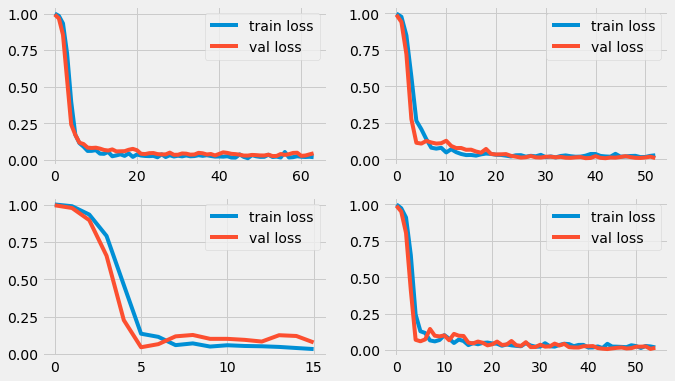

In [30]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(history1.history['loss'],label = 'train loss')
#plt.plot(history.history['mean_absolute_error']) val_loss
ax[0,0].plot(history1.history['val_loss'],label='val loss')
ax[0,0].legend()


ax[0,1].plot(history2.history['loss'],label = 'train loss')
ax[0,1].plot(history2.history['val_loss'],label='val loss')
ax[0,1].legend()

ax[1,0].plot(history3.history['loss'],label = 'train loss')
ax[1,0].plot(history3.history['val_loss'],label='val loss')
ax[1,0].legend()

ax[1,1].plot(history4.history['loss'],label = 'train loss')
ax[1,1].plot(history4.history['val_loss'],label='val loss')
ax[1,1].legend()

In [31]:
pred = model1.predict(p1[2])
pred_inv1 = p1[4].inverse_transform(pred.reshape(-1,1))

pred = model2.predict(p2[2])
pred_inv2 = p2[4].inverse_transform(pred.reshape(-1,1))

pred = model3.predict(p3[2])
pred_inv3 = p3[4].inverse_transform(pred.reshape(-1,1))

pred = model4.predict(p4[2])
pred_inv4 = p4[4].inverse_transform(pred.reshape(-1,1))

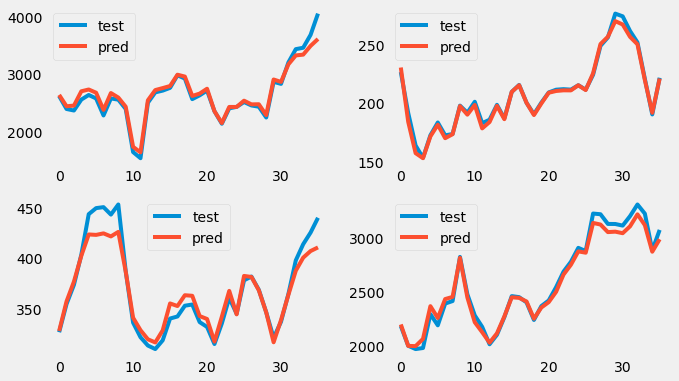

In [32]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(y_test_p1,label='test')
ax[0,0].plot(pred_inv1,label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(y_test_p2,label='test')
ax[0,1].plot(pred_inv2,label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(y_test_p3,label='test')
ax[1,0].plot(pred_inv3,label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(y_test_p4,label='test')
ax[1,1].plot(pred_inv4,label='pred')
ax[1,1].grid()
ax[1,1].legend()


In [33]:
rmse(y_test_p2,pred_inv2)

250.17991386864313

In [34]:
pred_inv2

array([[230.17625],
       [183.73325],
       [156.88629],
       [152.5569 ],
       [171.23117],
       [181.21135],
       [169.6934 ],
       [173.09894],
       [197.1545 ],
       [189.8225 ],
       [198.13098],
       [178.05997],
       [183.52606],
       [197.37538],
       [185.9687 ],
       [209.33904],
       [215.00699],
       [199.98592],
       [189.476  ],
       [199.39748],
       [208.59819],
       [210.08882],
       [210.64677],
       [210.59515],
       [214.99559],
       [210.87778],
       [225.2525 ],
       [250.26526],
       [256.4984 ],
       [269.87088],
       [266.97763],
       [256.40894],
       [250.04764],
       [219.41544],
       [191.4233 ],
       [220.7403 ]], dtype=float32)

In [35]:
y_test_p2

array([226.3079834 , 191.2504425 , 163.42793274, 152.90989685,
       172.19335938, 183.12289429, 172.13076782, 173.25961304,
       197.55158997, 191.49095154, 200.86398315, 182.57246399,
       185.48455811, 198.24235535, 186.60462952, 209.32241821,
       215.27835083, 199.98606873, 190.20433044, 200.09783936,
       208.84860229, 211.18844604, 211.65866089, 211.24963379,
       215.00749207, 211.22550964, 223.98025513, 248.71740723,
       255.9223938 , 276.30844116, 273.9772644 , 261.39431763,
       251.64836121, 220.47206116, 189.99992371, 221.39825439])

In [36]:
rmse_common = (rmse(y_test_p1,pred_inv1) + rmse(y_test_p2,pred_inv2)+rmse(y_test_p3,pred_inv3) + rmse(y_test_p4,pred_inv4))/4
print(rmse_common)
r2_score_com = (r2_score(y_test_p1,pred_inv1)+r2_score(y_test_p2,pred_inv2) + r2_score(y_test_p3,pred_inv3) + r2_score(y_test_p4,pred_inv4))/4
print(r2_score_com)

1938.0371487964494
0.9632967393763733


In [37]:
rmse_common = (mean_squared_error(y_test_p1,pred_inv1) + mean_squared_error(y_test_p2,pred_inv2)+mean_squared_error(y_test_p3,pred_inv3) + mean_squared_error(y_test_p4,pred_inv4))/4
print(rmse_common)

3312.5552071754655


In [38]:
rmse(y_test_p1,pred_inv1)

3765.0868433524092

# Autoregressive models

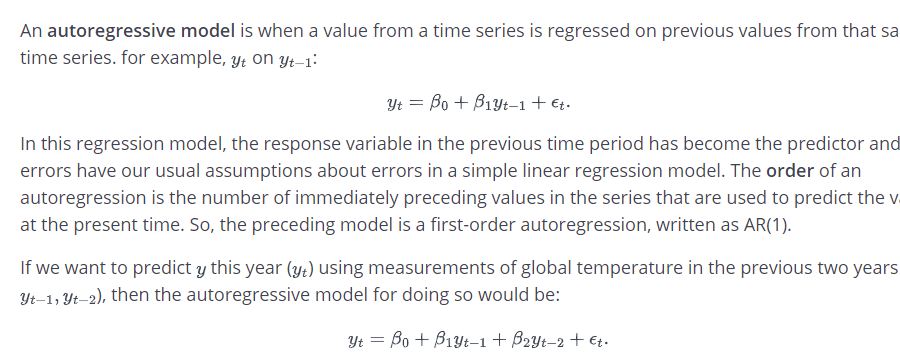

### ARCH